In [1]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Loading the MA Ward Precinct Shapefile

WP_df = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")
WP_df

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88..."
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88..."
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88..."
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90..."
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,6.514463e+05,4262.156864,"POLYGON ((236328.257 897806.825, 236339.793 89..."
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,2.011975e+05,2455.103261,"POLYGON ((234387.165 896770.015, 234357.873 89..."
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,3.719089e+05,3754.545614,"POLYGON ((234109.165 896499.623, 234101.151 89..."
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,3.111999e+05,3381.654371,"POLYGON ((233908.714 896981.859, 233743.883 89..."


In [3]:
# Loading in the MA Census Block group shapefile

MA_df = gpd.read_file("CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKGROUPS_POLY.shp")
MA_df


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((245073.458 857943.957, 244937.535 85..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((242521.255 859747.835, 242574.643 85..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((244276.840 862120.231, 244318.253 86..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((241369.452 874137.571, 241375.528 87..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((240747.746 873189.605, 240726.355 87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,25,017,368200,2,250173682002,Block Group 2,G5030,244465.0,0.0,+42.3839297,...,60.4049,698,273,0102941,107370,0006912,0107370,2.444509e+05,2422.770421,"POLYGON ((221294.315 903757.701, 221268.845 90..."
4975,25,017,368200,4,250173682004,Block Group 4,G5030,4895236.0,26402.0,+42.3893443,...,1216.0862,1576,711,0102943,107372,0006914,0107372,4.921346e+06,15906.408472,"POLYGON ((218613.885 906734.200, 218621.222 90..."
4976,25,017,358300,2,250173583002,Block Group 2,G5030,3205730.0,8645.0,+42.4289121,...,794.2427,1936,693,0102804,107233,0006805,0107233,3.214199e+06,8309.671233,"POLYGON ((222116.947 909385.708, 222108.345 90..."
4977,25,017,358400,3,250173584003,Block Group 3,G5030,1851257.0,26700.0,+42.4435708,...,464.0270,1662,635,0102808,107237,0006808,0107237,1.877858e+06,7523.361318,"POLYGON ((221625.072 910877.416, 221623.187 91..."


In [4]:
# Converting the shapefile's coordinate system to lat/long

MA_df = MA_df.to_crs("EPSG:4326")
MA_df

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((-70.95620 41.97057, -70.95784 41.970..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((-70.98686 41.98695, -70.98622 41.986..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((-70.96549 42.00821, -70.96500 42.008..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((-70.99974 42.11656, -70.99967 42.116..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((-71.00733 42.10806, -71.00758 42.108..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,25,017,368200,2,250173682002,Block Group 2,G5030,244465.0,0.0,+42.3839297,...,60.4049,698,273,0102941,107370,0006912,0107370,2.444509e+05,2422.770421,"POLYGON ((-71.24141 42.38404, -71.24172 42.383..."
4975,25,017,368200,4,250173682004,Block Group 4,G5030,4895236.0,26402.0,+42.3893443,...,1216.0862,1576,711,0102943,107372,0006914,0107372,4.921346e+06,15906.408472,"POLYGON ((-71.27386 42.41090, -71.27378 42.410..."
4976,25,017,358300,2,250173583002,Block Group 2,G5030,3205730.0,8645.0,+42.4289121,...,794.2427,1936,693,0102804,107233,0006805,0107233,3.214199e+06,8309.671233,"POLYGON ((-71.23121 42.43468, -71.23131 42.434..."
4977,25,017,358400,3,250173584003,Block Group 3,G5030,1851257.0,26700.0,+42.4435708,...,464.0270,1662,635,0102808,107237,0006808,0107237,1.877858e+06,7523.361318,"POLYGON ((-71.23713 42.44812, -71.23715 42.447..."


In [5]:

WP_df = WP_df.to_crs("EPSG:4326")
WP_df

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,3.151713e+06,8711.937896,"POLYGON ((-70.98701 42.20298, -70.98707 42.202..."
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,5.163667e+06,11175.567690,"POLYGON ((-70.97364 42.18719, -70.97367 42.186..."
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,2.937925e+06,9455.882837,"POLYGON ((-70.99625 42.18330, -70.99639 42.183..."
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,3.594632e+05,3340.823153,"POLYGON ((-71.02297 42.38672, -71.02301 42.386..."
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,1.903509e+05,2247.883591,"POLYGON ((-71.03354 42.38989, -71.03373 42.389..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,6.514463e+05,4262.156864,"POLYGON ((-71.05922 42.32991, -71.05909 42.329..."
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,2.011975e+05,2455.103261,"POLYGON ((-71.08283 42.32066, -71.08319 42.320..."
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,3.719089e+05,3754.545614,"POLYGON ((-71.08622 42.31824, -71.08632 42.317..."
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,3.111999e+05,3381.654371,"POLYGON ((-71.08863 42.32259, -71.09064 42.320..."


In [16]:
# Creates a geospatial merge based on the intersection area between the census block group and ward precinct shapefiles

merged_overlay = gpd.overlay(MA_df, WP_df, how='intersection')
merged_overlay

<ipython-input-16-f32e62cd0898>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 10729 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  merged_overlay = gpd.overlay(MA_df, WP_df, how='intersection')


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98037 41.96639, -70.98038 41.966..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-71.00731 41.96060, -71.00725 41.960..."
2,25,023,525104,3,250235251043,Block Group 3,G5030,845703.0,7175.0,+41.9797562,...,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.96593 41.98216, -70.96632 41.981..."
3,25,023,525104,1,250235251041,Block Group 1,G5030,8620688.0,58467.0,+41.9459898,...,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98139 41.96339, -70.98123 41.963..."
4,25,023,561200,1,250235612001,Block Group 1,G5030,1074325.0,1294.0,+41.9879935,...,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.97325 41.98661, -70.97354 41.986..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,25,017,341600,3,250173416003,Block Group 3,G5030,184081.0,0.0,+42.4346547,...,5-1,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06094 42.43417, -71.06042 42.434..."
10106,25,017,341600,4,250173416004,Block Group 4,G5030,108000.0,0.0,+42.4306285,...,5-1,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06286 42.43224, -71.06252 42.432..."
10107,25,017,341700,3,250173417003,Block Group 3,G5030,238779.0,0.0,+42.4328923,...,5-1,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.05054 42.43171, -71.05105 42.431..."
10108,25,017,341700,5,250173417005,Block Group 5,G5030,113693.0,0.0,+42.4343116,...,5-1,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.04947 42.43281, -71.05001 42.432..."


In [7]:
# Testing the calculation of percentage of census tract block group and ward precinct area.

TRACT_100500 = merged_overlay[merged_overlay['TRACTCE10'] == '100500']
TRACT_100500['Intersection_area'] = TRACT_100500.geometry.area
TRACT_100500['Percentage_of_Tract'] = (TRACT_100500['Intersection_area']/(TRACT_100500['Intersection_area'].sum()))*100
TRACT_100500



<ipython-input-7-d4154a619f52>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  TRACT_100500['Intersection_area'] = TRACT_100500.geometry.area
/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry,Intersection_area,Percentage_of_Tract
3296,25,025,100500,2,250251005002,Block Group 2,G5030,187391.0,0.0,+42.2868560,...,BOSTON,35,0.098358,62.949218,2016,254746.448735,3060.115425,"MULTIPOLYGON (((-71.06634 42.28867, -71.06623 ...",1.286055e-07,0.137170
3297,25,025,100500,3,250251005003,Block Group 3,G5030,136245.0,0.0,+42.2899784,...,BOSTON,35,0.098358,62.949218,2016,254746.448735,3060.115425,"POLYGON ((-71.06736 42.29151, -71.06670 42.291...",6.970372e-06,7.434565
3298,25,025,100500,1,250251005001,Block Group 1,G5030,124827.0,0.0,+42.2899094,...,BOSTON,35,0.098358,62.949218,2016,254746.448735,3060.115425,"POLYGON ((-71.06634 42.28867, -71.06670 42.288...",1.342361e-05,14.317558
3302,25,025,100500,2,250251005002,Block Group 2,G5030,187391.0,0.0,+42.2868560,...,BOSTON,35,0.107188,68.600417,2016,277616.037474,3044.242354,"POLYGON ((-71.07117 42.28796, -71.07092 42.288...",9.013740e-10,0.000961
3303,25,025,100500,3,250251005003,Block Group 3,G5030,136245.0,0.0,+42.2899784,...,BOSTON,35,0.107188,68.600417,2016,277616.037474,3044.242354,"POLYGON ((-71.07117 42.28796, -71.07112 42.288...",7.845652e-06,8.368134
3304,25,025,100500,1,250251005001,Block Group 1,G5030,124827.0,0.0,+42.2899094,...,BOSTON,35,0.107188,68.600417,2016,277616.037474,3044.242354,"POLYGON ((-71.06506 42.29221, -71.06459 42.292...",1.262579e-09,0.001347
3305,25,025,100500,5,250251005005,Block Group 5,G5030,165421.0,0.0,+42.2886592,...,BOSTON,35,0.107188,68.600417,2016,277616.037474,3044.242354,"POLYGON ((-71.07160 42.29022, -71.07151 42.289...",4.554022e-08,0.048573
3311,25,025,100500,2,250251005002,Block Group 2,G5030,187391.0,0.0,+42.2868560,...,BOSTON,35,0.087436,55.958868,2016,226457.504223,1947.053963,"POLYGON ((-71.07120 42.28729, -71.07119 42.287...",2.025896e-05,21.608110
3312,25,025,100500,4,250251005004,Block Group 4,G5030,245048.0,0.0,+42.2871787,...,BOSTON,35,0.087436,55.958868,2016,226457.504223,1947.053963,"POLYGON ((-71.07117 42.28644, -71.07117 42.286...",4.154619e-08,0.044313
3313,25,025,100500,3,250251005003,Block Group 3,G5030,136245.0,0.0,+42.2899784,...,BOSTON,35,0.087436,55.958868,2016,226457.504223,1947.053963,"POLYGON ((-71.06836 42.28871, -71.06952 42.288...",5.631274e-08,0.060063


In [12]:
TRACT_100500[['TRACTCE10','BLKGRPCE10','TOWN','WARD','PRECINCT']]

,TRACTCE10,BLKGRPCE10,TOWN,WARD,PRECINCT
3296,100500,2,BOSTON,16,3
3297,100500,3,BOSTON,16,3
3298,100500,1,BOSTON,16,3
3302,100500,2,BOSTON,17,6
3303,100500,3,BOSTON,17,6
3304,100500,1,BOSTON,17,6
3305,100500,5,BOSTON,17,6
3311,100500,2,BOSTON,17,9
3312,100500,4,BOSTON,17,9
3313,100500,3,BOSTON,17,9


In [8]:
TRACT_100500.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES_1', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA_1',
       'SHAPE_LEN_1', 'WP_NAME', 'WARD', 'PRECINCT', 'DISTRICT', 'POP_2010',
       'TOWN', 'TOWN_ID', 'AREA_SQMI', 'AREA_ACRES_2', 'YEAR', 'SHAPE_AREA_2',
       'SHAPE_LEN_2', 'geometry', 'Intersection_area', 'Percentage_of_Tract'],
      dtype='object')

In [10]:
TRACT_100500.geometry.area

<ipython-input-10-10db197aae41>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  TRACT_100500.geometry.area


3296    1.286055e-07
3297    6.970372e-06
3298    1.342361e-05
3302    9.013740e-10
3303    7.845652e-06
3304    1.262579e-09
3305    4.554022e-08
3311    2.025896e-05
3312    4.154619e-08
3313    5.631274e-08
3316    1.965005e-10
3317    8.847226e-09
3318    3.965758e-08
3323    1.574245e-08
3330    1.091388e-07
3331    2.815901e-09
3339    7.364990e-09
3340    1.834266e-05
3343    1.185222e-05
3348    9.150766e-08
6097    8.358391e-06
6098    6.011250e-06
6104    5.066289e-09
8180    1.386724e-07
dtype: float64

## Adding Tract percentage makeup

In [13]:
# Creating a new column with the intersection area between the two shapefiles.

merged_overlay['Intersection_area'] = merged_overlay.geometry.area
merged_overlay



<ipython-input-13-51d97754ffba>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_overlay['Intersection_area'] = merged_overlay.geometry.area


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry,Intersection_area,Percentage_of_Tract
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98037 41.96639, -70.98038 41.966...",2.003705e-04,8.773159e-03
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-71.00731 41.96060, -71.00725 41.960...",4.928800e-04,2.158059e-02
2,25,023,525104,3,250235251043,Block Group 3,G5030,845703.0,7175.0,+41.9797562,...,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.96593 41.98216, -70.96632 41.981...",9.265292e-05,4.056778e-03
3,25,023,525104,1,250235251041,Block Group 1,G5030,8620688.0,58467.0,+41.9459898,...,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98139 41.96339, -70.98123 41.963...",6.400541e-14,2.802456e-12
4,25,023,561200,1,250235612001,Block Group 1,G5030,1074325.0,1294.0,+41.9879935,...,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.97325 41.98661, -70.97354 41.986...",1.139253e-05,4.988183e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,25,017,341600,3,250173416003,Block Group 3,G5030,184081.0,0.0,+42.4346547,...,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06094 42.43417, -71.06042 42.434...",6.250827e-06,2.736904e-04
10106,25,017,341600,4,250173416004,Block Group 4,G5030,108000.0,0.0,+42.4306285,...,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06286 42.43224, -71.06252 42.432...",6.682412e-06,2.925872e-04
10107,25,017,341700,3,250173417003,Block Group 3,G5030,238779.0,0.0,+42.4328923,...,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.05054 42.43171, -71.05105 42.431...",2.559678e-05,1.120747e-03
10108,25,017,341700,5,250173417005,Block Group 5,G5030,113693.0,0.0,+42.4343116,...,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.04947 42.43281, -71.05001 42.432...",3.046046e-06,1.333701e-04


In [23]:
# Pulling the Census tract block group into a seperate column.

merged_overlay['Tract_BlockGroup'] = merged_overlay['TRACTCE10'] + merged_overlay['BLKGRPCE10']
merged_overlay


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry,Tract_BlockGroup
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98037 41.96639, -70.98038 41.966...",5251042
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-71.00731 41.96060, -71.00725 41.960...",5251044
2,25,023,525104,3,250235251043,Block Group 3,G5030,845703.0,7175.0,+41.9797562,...,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.96593 41.98216, -70.96632 41.981...",5251043
3,25,023,525104,1,250235251041,Block Group 1,G5030,8620688.0,58467.0,+41.9459898,...,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.98139 41.96339, -70.98123 41.963...",5251041
4,25,023,561200,1,250235612001,Block Group 1,G5030,1074325.0,1294.0,+41.9879935,...,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877,"POLYGON ((-70.97325 41.98661, -70.97354 41.986...",5612001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,25,017,341600,3,250173416003,Block Group 3,G5030,184081.0,0.0,+42.4346547,...,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06094 42.43417, -71.06042 42.434...",3416003
10106,25,017,341600,4,250173416004,Block Group 4,G5030,108000.0,0.0,+42.4306285,...,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.06286 42.43224, -71.06252 42.432...",3416004
10107,25,017,341700,3,250173417003,Block Group 3,G5030,238779.0,0.0,+42.4328923,...,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.05054 42.43171, -71.05105 42.431...",3417003
10108,25,017,341700,5,250173417005,Block Group 5,G5030,113693.0,0.0,+42.4343116,...,3687,MALDEN,165,0.227,145.27,2012,5.878774e+05,3953.744584,"POLYGON ((-71.04947 42.43281, -71.05001 42.432...",3417005


In [49]:
# Filtering for Boston, without this filter you can do the entire MA merge.

Boston_merged_overlay = merged_overlay[merged_overlay['TOWN'] == "BOSTON"]
Boston_merged_overlay

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry,Tract_BlockGroup
1820,25,021,400400,3,250214004003,Block Group 3,G5030,209510.0,0.0,+42.3408767,...,2466,BOSTON,35,0.062589,40.056793,2016,162104.090279,1856.908830,"POLYGON ((-71.13998 42.34214, -71.13998 42.342...",4004003
1821,25,025,000503,1,250250005031,Block Group 1,G5030,63632.0,0.0,+42.3407803,...,2466,BOSTON,35,0.062589,40.056793,2016,162104.090279,1856.908830,"MULTIPOLYGON (((-71.14694 42.34125, -71.14698 ...",0005031
1822,25,025,000504,2,250250005042,Block Group 2,G5030,101451.0,0.0,+42.3414576,...,2466,BOSTON,35,0.062589,40.056793,2016,162104.090279,1856.908830,"POLYGON ((-71.14756 42.34062, -71.14733 42.340...",0005042
1823,25,025,000504,1,250250005041,Block Group 1,G5030,97322.0,0.0,+42.3440423,...,2466,BOSTON,35,0.062589,40.056793,2016,162104.090279,1856.908830,"MULTIPOLYGON (((-71.14274 42.34369, -71.14214 ...",0005041
1824,25,025,000504,4,250250005044,Block Group 4,G5030,47057.0,0.0,+42.3414076,...,2466,BOSTON,35,0.062589,40.056793,2016,162104.090279,1856.908830,"POLYGON ((-71.14190 42.34044, -71.14205 42.340...",0005044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,25,025,091700,3,250250917003,Block Group 3,G5030,54173.0,0.0,+42.3031036,...,1858,BOSTON,35,0.052572,33.645805,2016,136159.741192,1730.050614,"POLYGON ((-71.06802 42.30263, -71.06837 42.303...",0917003
8355,25,025,091700,2,250250917002,Block Group 2,G5030,78459.0,0.0,+42.3047084,...,1858,BOSTON,35,0.052572,33.645805,2016,136159.741192,1730.050614,"POLYGON ((-71.06846 42.30401, -71.06709 42.304...",0917002
8356,25,025,091700,1,250250917001,Block Group 1,G5030,156693.0,0.0,+42.3032372,...,1858,BOSTON,35,0.052572,33.645805,2016,136159.741192,1730.050614,"MULTIPOLYGON (((-71.06800 42.30261, -71.06817 ...",0917001
8357,25,025,091800,2,250250918002,Block Group 2,G5030,89288.0,0.0,+42.3073725,...,1858,BOSTON,35,0.052572,33.645805,2016,136159.741192,1730.050614,"POLYGON ((-71.06702 42.30624, -71.06701 42.306...",0918002


In [29]:
Suffolk_County_CVAP = pd.read_excel("/Users/gowthamasokan/Redistricting/suffolk_county_block_groups.xlsx")
Suffolk_County_CVAP

,geoid,name,median_housing_price,pop,pop_whi,pop_bla,pop_his,pop_asi,cvap_total,cvap_asi,cvap_bla,cvap_whi,cvap_his
0,250250909012,"Block Group 2, Census Tract 909.01, Suffolk Co...",NaN,1925,676,162,345,680,990,50,205,555,125
1,250250907003,"Block Group 3, Census Tract 907, Suffolk Count...",383700.0,1185,652,89,267,120,745,35,80,535,70
2,250250921012,"Block Group 2, Census Tract 921.01, Suffolk Co...",387300.0,1004,247,57,73,619,810,380,65,195,130
3,250250002024,"Block Group 4, Census Tract 2.02, Suffolk Coun...",NaN,925,71,51,764,14,360,30,4,105,220
4,250251707021,"Block Group 1, Census Tract 1707.02, Suffolk C...",NaN,664,125,151,388,0,355,0,85,65,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,250250005022,"Block Group 2, Census Tract 5.02, Suffolk Coun...",389500.0,742,570,35,56,81,575,50,45,435,40
642,250250809001,"Block Group 1, Census Tract 809, Suffolk Count...",NaN,1265,553,33,104,575,870,90,135,470,120
643,250250912003,"Block Group 3, Census Tract 912, Suffolk Count...",384100.0,652,346,235,27,4,370,0,110,260,0
644,250250819002,"Block Group 2, Census Tract 819, Suffolk Count...",608500.0,813,38,560,192,23,640,0,415,30,195


In [33]:
Suffolk_County_CVAP['geoid'] = Suffolk_County_CVAP['geoid'].astype(str)
Suffolk_County_CVAP['geoid']

0      250250909012
1      250250907003
2      250250921012
3      250250002024
4      250251707021
           ...     
641    250250005022
642    250250809001
643    250250912003
644    250250819002
645    250250910012
Name: geoid, Length: 646, dtype: object

In [50]:
Boston_merged_overlay['GEOID10'] = Boston_merged_overlay['GEOID10'].astype(str)
Boston_merged_overlay['GEOID10']

/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


1820    250214004003
1821    250250005031
1822    250250005042
1823    250250005041
1824    250250005044
            ...     
8354    250250917003
8355    250250917002
8356    250250917001
8357    250250918002
8358    250250918001
Name: GEOID10, Length: 1998, dtype: object

In [42]:
list(merged_overlay['GEOID10'].unique())

['250235251042',
 '250235251044',
 '250235251043',
 '250235251041',
 '250235612001',
 '250235251012',
 '250235251011',
 '250235251014',
 '250235252041',
 '250235253001',
 '250235251013',
 '250235231002',
 '250235231001',
 '250235232011',
 '250235232021',
 '250235241021',
 '250235241013',
 '250235241011',
 '250235241023',
 '250235241022',
 '250235252032',
 '250235252042',
 '250235252031',
 '250235252033',
 '250235202022',
 '250235202021',
 '250235202013',
 '250235101003',
 '250235101004',
 '250235101001',
 '250235102004',
 '250235102003',
 '250235103001',
 '250235101002',
 '250235102002',
 '250235104001',
 '250235103002',
 '250235104002',
 '250235110001',
 '250235102001',
 '250235111003',
 '250235111005',
 '250235111001',
 '250214211003',
 '250214212003',
 '250235105011',
 '250235105012',
 '250235105025',
 '250214571002',
 '250214571004',
 '250214571001',
 '250214571003',
 '250235091014',
 '250235091024',
 '250235091025',
 '250235091011',
 '250235091012',
 '250235091023',
 '250235091022

In [43]:
list(Suffolk_County_CVAP['geoid'].unique())

['250250909012',
 '250250907003',
 '250250921012',
 '250250002024',
 '250251707021',
 '250250004012',
 '250250702002',
 '250251701004',
 '250250701016',
 '250251802001',
 '250251104011',
 '250251401061',
 '250250810012',
 '250251801012',
 '250250604004',
 '250251005002',
 '250251605011',
 '250250008021',
 '250250510002',
 '250250104052',
 '250250706001',
 '250250923004',
 '250250818001',
 '250250916003',
 '250250507002',
 '250250804011',
 '250250107023',
 '250250707002',
 '250250806013',
 '250250004013',
 '250250812001',
 '250250301001',
 '250250102034',
 '250251401051',
 '250251401072',
 '250250904004',
 '250250913001',
 '250250820002',
 '250251005005',
 '250250918002',
 '250251605013',
 '250251802004',
 '250250924001',
 '250250801002',
 '250250302001',
 '250250812002',
 '250250403001',
 '250251401052',
 '250251001006',
 '250251101037',
 '250250007013',
 '250250002011',
 '250250924003',
 '250251702001',
 '250251003004',
 '250250007014',
 '250251002001',
 '250250008032',
 '250250917003

In [47]:
merged_overlay[merged_overlay['GEOID10'].isnull()]

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_2,YEAR,SHAPE_AREA_2,SHAPE_LEN_2,geometry,Tract_BlockGroup


In [54]:
# Merging the geospatial intersection file of ward precincts and census block groups

Boston_Merged_CVAP = pd.merge(Boston_merged_overlay, Suffolk_County_CVAP, left_on = 'GEOID10', right_on = 'geoid', how='left')
Boston_Merged_CVAP



,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,pop,pop_whi,pop_bla,pop_his,pop_asi,cvap_total,cvap_asi,cvap_bla,cvap_whi,cvap_his
0,25,021,400400,3,250214004003,Block Group 3,G5030,209510.0,0.0,+42.3408767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,025,000503,1,250250005031,Block Group 1,G5030,63632.0,0.0,+42.3407803,...,677.0,431.0,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0
2,25,025,000504,2,250250005042,Block Group 2,G5030,101451.0,0.0,+42.3414576,...,1318.0,932.0,0.0,220.0,166.0,940.0,80.0,0.0,785.0,65.0
3,25,025,000504,1,250250005041,Block Group 1,G5030,97322.0,0.0,+42.3440423,...,1372.0,762.0,32.0,7.0,431.0,1045.0,165.0,30.0,680.0,35.0
4,25,025,000504,4,250250005044,Block Group 4,G5030,47057.0,0.0,+42.3414076,...,783.0,584.0,61.0,79.0,59.0,700.0,25.0,110.0,495.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,25,025,091700,3,250250917003,Block Group 3,G5030,54173.0,0.0,+42.3031036,...,686.0,0.0,415.0,155.0,0.0,370.0,0.0,310.0,0.0,60.0
1994,25,025,091700,2,250250917002,Block Group 2,G5030,78459.0,0.0,+42.3047084,...,1164.0,9.0,614.0,343.0,69.0,575.0,35.0,410.0,4.0,110.0
1995,25,025,091700,1,250250917001,Block Group 1,G5030,156693.0,0.0,+42.3032372,...,1364.0,116.0,704.0,179.0,248.0,770.0,135.0,415.0,115.0,75.0
1996,25,025,091800,2,250250918002,Block Group 2,G5030,89288.0,0.0,+42.3073725,...,1285.0,0.0,972.0,106.0,0.0,530.0,0.0,480.0,15.0,35.0


In [15]:
Census_Tract_list = list(merged_overlay['TRACTCE10'])
Census_Tract_list

['525104',
 '525104',
 '525104',
 '525104',
 '561200',
 '525101',
 '525101',
 '525101',
 '525104',
 '525104',
 '525101',
 '525101',
 '525104',
 '525204',
 '525104',
 '525300',
 '525104',
 '525204',
 '561200',
 '525101',
 '525101',
 '525101',
 '523100',
 '523100',
 '523201',
 '523202',
 '524102',
 '524101',
 '524101',
 '524102',
 '524102',
 '525203',
 '525204',
 '525204',
 '525203',
 '525203',
 '525203',
 '525101',
 '520202',
 '520202',
 '520201',
 '510100',
 '510100',
 '510100',
 '510200',
 '510200',
 '510300',
 '510100',
 '510100',
 '510100',
 '510200',
 '510200',
 '510200',
 '510300',
 '510400',
 '510300',
 '510400',
 '511000',
 '510200',
 '510200',
 '511100',
 '511100',
 '511100',
 '421100',
 '421200',
 '510501',
 '510501',
 '510502',
 '457100',
 '457100',
 '457100',
 '457100',
 '509101',
 '509102',
 '509102',
 '509101',
 '509101',
 '509102',
 '509102',
 '509102',
 '509101',
 '509102',
 '509101',
 '509102',
 '530100',
 '530400',
 '530400',
 '530400',
 '530100',
 '530100',
 '530400',

In [56]:
Census_Tract_BlockGroup_list = list(Boston_Merged_CVAP['Tract_BlockGroup'])
Census_Tract_BlockGroup_list

['4004003',
 '0005031',
 '0005042',
 '0005041',
 '0005044',
 '0005043',
 '4003003',
 '0005041',
 '0007012',
 '0007011',
 '0007014',
 '0007013',
 '0007015',
 '0007044',
 '0007042',
 '0007043',
 '4004003',
 '0005042',
 '0005041',
 '0005044',
 '0004011',
 '0004012',
 '0006023',
 '0007014',
 '0007013',
 '0007015',
 '1008005',
 '1008004',
 '1009001',
 '1009005',
 '1009002',
 '1009003',
 '4001001',
 '0102043',
 '0102042',
 '0008021',
 '0008031',
 '0008032',
 '0008025',
 '0101033',
 '0101031',
 '9815011',
 '0102041',
 '0101043',
 '0007031',
 '4001001',
 '4001002',
 '0102043',
 '0102042',
 '0102033',
 '0102032',
 '0102041',
 '9818001',
 '0102034',
 '0101043',
 '4001002',
 '0102043',
 '0102042',
 '0810011',
 '0810012',
 '0808011',
 '0809001',
 '0809003',
 '0103002',
 '0104051',
 '0103001',
 '9818001',
 '0808012',
 '4003003',
 '0008021',
 '0008032',
 '0008025',
 '0007031',
 '0007032',
 '0007044',
 '0007042',
 '0007043',
 '0007012',
 '0007031',
 '0007032',
 '0007041',
 '0007044',
 '0007042',
 '00

In [57]:
# Calculates the percentage of intersection area between each census tract block group and ward precinct. 
# This is done in batches as shown below, then we merge them back together.

for tracts in Census_Tract_BlockGroup_list:
    tract_df = Boston_Merged_CVAP[Boston_Merged_CVAP['Tract_BlockGroup'] == tracts]
    tract_df['Intersection_area'] = tract_df.geometry.area
    tract_df['Percentage_of_Tract'] = (tract_df['Intersection_area']/(tract_df['Intersection_area'].sum()))*100
    
    title = "Tract_BlockGroup_" + tracts + '.csv'
    tract_df.to_csv(title, encoding = 'utf-8')
    
    

<ipython-input-57-d72f29b1d7d5>:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract_df['Intersection_area'] = tract_df.geometry.area
/Users/gowthamasokan/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [58]:
# Merging the individual census tract block group files from above calculated for the percentage of area that they
# contribute to each intersecting ward precinct.

df_tract_areas = pd.DataFrame()

for tracts in Census_Tract_BlockGroup_list:
    tract_file = "Tract_BlockGroup_" + tracts + ".csv"
    data = pd.read_csv(tract_file)
    df_tract_areas = df_tract_areas.append(data)
    
df_tract_areas

,Unnamed: 0,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,...,pop_bla,pop_his,pop_asi,cvap_total,cvap_asi,cvap_bla,cvap_whi,cvap_his,Intersection_area,Percentage_of_Tract
0,0,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185579e-14,95.733457
1,16,25,21,400400,3,250214004003,Block Group 3,G5030,209510.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.740448e-16,4.266543
0,1,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,0.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,1.845681e-07,2.655062
1,200,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,0.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,1.428841e-08,0.205543
2,932,25,25,503,1,250250005031,Block Group 1,G5030,63632.0,0.0,...,0.0,31.0,74.0,655.0,35.0,10.0,500.0,40.0,8.235244e-09,0.118466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1475,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,0.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,4.731498e-08,0.280330
2,1497,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,0.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,7.206035e-06,42.694046
3,1892,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,0.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,2.144461e-09,0.012705
4,1991,25,25,91800,1,250250918001,Block Group 1,G5030,154577.0,0.0,...,741.0,281.0,69.0,745.0,30.0,360.0,70.0,290.0,9.616546e-06,56.975747


In [59]:
df_tract_areas.to_csv("MA_Block_groups_WP_area_proportional_merge.csv", encoding="utf-8")

In [6]:
# UPDATE: This is the old spatial merge that uses the geopandas sjoin function to merge census block groups to 
# their intersecting ward precincts.

# Completing the merge to output the addresses merged with the particular census tracts

Spatial_merge_df = sjoin(MA_df, WP_df, how='left', op='intersects')

Spatial_merge_df

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES_right,YEAR,SHAPE_AREA_right,SHAPE_LEN_right
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,4,4,3904,BRIDGEWATER,42,6.056,3875.80,2012,1.568486e+07,20641.267938
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,2,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,5,5,3623,BRIDGEWATER,42,1.543,987.39,2012,3.995852e+06,9550.729218
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,1,1,3873,BRIDGEWATER,42,5.767,3691.10,2012,1.493741e+07,21003.563879
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,2,2,3886,BRIDGEWATER,42,2.961,1894.97,2012,7.668706e+06,12250.788877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,25,017,358400,1,250173584001,Block Group 1,G5030,939683.0,0.0,+42.4452367,...,9,9,3472,LEXINGTON,155,3.399,2175.67,2012,8.804656e+06,16846.619122
4978,25,017,358400,1,250173584001,Block Group 1,G5030,939683.0,0.0,+42.4452367,...,4,4,3475,LEXINGTON,155,1.293,827.23,2012,3.347697e+06,8666.973004
4978,25,017,358400,1,250173584001,Block Group 1,G5030,939683.0,0.0,+42.4452367,...,5,5,3526,LEXINGTON,155,1.828,1170.14,2012,4.735404e+06,10760.414353
4978,25,017,358400,1,250173584001,Block Group 1,G5030,939683.0,0.0,+42.4452367,...,8,8,3427,LEXINGTON,155,1.433,916.92,2012,3.710674e+06,8048.276445


<AxesSubplot:>

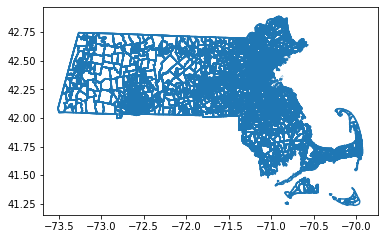

In [10]:
Spatial_merge_df.boundary.plot()

In [7]:
Spatial_merge_df.to_csv("MA_Block_groups_Ward_Precinct_merge.csv", encoding="utf-8")